In [80]:
import pandas as pd
file = pd.read_csv('C:\\Users\\kuzni\\PycharmProjects\\pythonProject1\\files\\1preprocessed_data_all.csv', encoding="utf-8-sig")
data = file

In [81]:
data['text']

0     добрый день . договариваться , высылать информ...
1     уважаемые клиент , просить – сделать ! 😱 🔥 🔥 🔥...
2     номер просмотреть покупатель страна помнить пр...
3                                                 гуля 
4     жаныбек account- account- аз аз жаныбек отдади...
5     жаркий летний день 🥵 , тяжёлый выходить улица ...
6     🔥 ысык күндөр ысык - көлгө тартат . кошулуңуз ...
7     kupuj ulubiony marka atrakcyjny cena lalafo ! ...
8     🙌 🏻cześć ! 📆 mamy początek miesiąca , a to ozn...
9     🔥 ысык күндөр ысык - көлгө тартат . кошулуңуз ...
10    poslednja cena irma voli vaš ogla . ne ustruča...
11    poslednja cena je izvolite mogu da spustim din...
12    zdravo , smo mi - lalafo 😉 da li vam je kupac ...
13    salam gec cavab gelse wt yazin zeymet olmasa s...
14    izvoli te poz prodat je imate u slikama ... ma...
15    da li je aktuelan ? br account- voli vaš ogla ...
16    жаркий летний день 🥵 , тяжёлый выходить улица ...
17    хб ? отдадите , , ? извинить , неактуальны

In [82]:
data['text'][1]

'уважаемые клиент , просить – сделать ! 😱 🔥 🔥 🔥 🌷 специальный акция категория “ строительный отделочный услуга ” lalafo продлеваться май включительно ! 🔥 дарить личный профиль встроить кешбеком % месяц . 🔥 каждый пополнение поступать кошелёк + % сумма ! 👛 💣 ⚡ получить ? ✅ пополнять кошелёк акция сом . ✅ получаете дополнительный кешбек сом . ✅ итого кошелёк сом . 🤩 🤩 🤩 🎁 получать подключить личный профиль: ✅ % постоянный кешбек каждый пополнение кошелёк ✅ увеличенный лимит бесплатный объявление размещение ✅ расширенные контактный 📌 персональный предложение подключить помощь менеджер . нажать кнопка " связаться менеджер " менеджер перезвонить ☎ , активировать акция 🚀 🚀 🚀 🔥 терять ни минута , жмите кнопка прямо сегодня получать звонок заказ . спешите , акция действовать май год включительно!с забота , lalafo 💚'

In [83]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kuzni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [84]:
ham_words = ''
spam_words = ''

In [85]:
# Creating a corpus of spam messages
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ''

# Creating a corpus of ham messages
for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ''

In [87]:
data = data.replace(['ham','spam'],[0, 1])
print(data['label'])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
Name: label, dtype: int64


In [88]:
import string
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))


    return "".join(text)

data['text'] = data['text'].apply(text_process)
data.head()

,owner_Id,total_recipients,total_chats,total_ad_chats,total_ad_triggers,text,owner_id,label,newest_message,oldest_message,total_messages,total_unique_messages,duration,chats_per_days,recipients_per_days
0,1,2,3,2,0,добрый день договариваться высылать информац...,1,0,2023-06-15 04:32:19,2023-01-27 04:37:18,3,3,138 days 23:55:01,0.021739,0.014493
1,10,0,1,0,0,уважаемые клиент просить – сделать 😱 🔥 🔥 🔥 🌷...,10,0,2023-05-22 06:23:31,2023-05-22 06:23:31,1,1,0 days 00:00:00,0.000100,0.000100
2,1027169,35,30,43,29,номер просмотреть покупатель страна помнить пр...,1027169,0,2023-07-11 09:58:15,2023-01-04 20:02:16,73,35,187 days 13:55:59,0.160428,0.187166
3,1028312,1,1,1,0,гуля,1028312,0,2023-05-11 07:03:48,2023-05-11 07:03:48,1,1,0 days 00:00:00,0.000100,0.000100
4,1041409,95,17,100,65,жаныбек account account аз аз жаныбек отдадите...,1041409,0,2023-07-11 04:49:57,2023-01-03 08:56:04,166,89,188 days 19:53:53,0.090426,0.505319


In [89]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [90]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  2166


In [91]:
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['', 'da', 'обмен', 'ogla', 'se', 'ne', 'vaš', 'poruku', 'voli', 'ustručavajte', 'napišete', 'интересовать', 'account', 'сом', 'httpslalafokgbishkekadsprodauilimenauid', 'здравствовать', 'm', 'lalafo', 'болот', 'je', 'деньга', '✅', 'бир', 'номер', 'керек', 'нужный', 'спасибо', 'var', 'позвонить', '❤', 'pulu', 'azn', 'httpslalafokgbishkekadsprodaetsaid', 'менен', 'товар', 'бишкек', 'httpstmegulbazar', '🚙', 'үчүн', 'алуу', 'бар', 'заказ', '⚡', 'ар', 'кошумча', 'üçün', 'воскресение', 'страница', 'алса', 'автор', 'əlaqə', 'alex', 'тапса', 'бирок', 'саат', 'маалымат', 'суббота', 'бензин', 'профиль', 'elə']


In [92]:
vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [93]:
import numpy as np

# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [94]:
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

word_vectors.shape

(30, 2166)

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'text' column using CountVectorizer
vectors = vectorizer.fit_transform(data['text'])

# Convert the sparse matrix to a DataFrame
features_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original data DataFrame with the features DataFrame
result_df_quant = pd.concat([data, features_df], axis=1)

print(result_df_quant)

    owner_Id  total_recipients  total_chats  total_ad_chats  \
0          1                 2            3               2   
1         10                 0            1               0   
2    1027169                35           30              43   
3    1028312                 1            1               1   
4    1041409                95           17             100   
5    1045307                99           80             101   
6    1049554                 7            8               7   
7        113                 0            1               0   
8      11723                 0            1               0   
9    1190699                40           35              42   
10   1206794                 3            2               3   
11   1248302                10           10              10   
12   1305227                 2            4               4   
13   1386418                40           47              47   
14   1503750                48           53            

In [95]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column using TfidfVectorizer
vectors = vectorizer.fit_transform(data['text'])

# Convert the sparse matrix to a DataFrame
features_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original data DataFrame with the features DataFrame
result_df = pd.concat([data, features_df], axis=1)

print(result_df)
vectors.shape

    owner_Id  total_recipients  total_chats  total_ad_chats  \
0          1                 2            3               2   
1         10                 0            1               0   
2    1027169                35           30              43   
3    1028312                 1            1               1   
4    1041409                95           17             100   
5    1045307                99           80             101   
6    1049554                 7            8               7   
7        113                 0            1               0   
8      11723                 0            1               0   
9    1190699                40           35              42   
10   1206794                 3            2               3   
11   1248302                10           10              10   
12   1305227                 2            4               4   
13   1386418                40           47              47   
14   1503750                48           53            

(30, 2051)

In [99]:
import os

def new_messages_to_file(df):
    # Create the directory
    directory = 'files'
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the CSV files in the created directory
    for name in '1':
        df.to_csv(os.path.join(directory, f'{name}tokenized_data.csv'), encoding="utf-8-sig")


new_messages_to_file(result_df)

In [ ]:
# normalize parameters

In [102]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame to store the normalized values
result_df_normalized = result_df_quant.copy()

# Select the columns you want to exclude from normalization
columns_to_exclude = ['text', 'owner_id', 'owner_Id', 'newest_message', 'oldest_message', 'duration']

# Get the list of columns to normalize by excluding the columns to exclude
columns_to_normalize = [col for col in result_df_normalized.columns if col not in columns_to_exclude]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Replace infinite and extremely large values with NaN
result_df_normalized[columns_to_normalize] = result_df_quant[columns_to_normalize].replace([np.inf, -np.inf], np.nan)

# Drop rows containing NaN (optional, depending on your data)
result_df_normalized.dropna(subset=columns_to_normalize, inplace=True)

# Apply Min-Max Scaling to the selected columns
result_df_normalized[columns_to_normalize] = scaler.fit_transform(result_df_normalized[columns_to_normalize])

In [103]:
result_df_normalized

,owner_Id,total_recipients,total_chats,total_ad_chats,total_ad_triggers,text,owner_id,label,newest_message,oldest_message,...,ясно,ясный,үйрөн,үчүн,өзгөргөндүгү,өзү,өзүң,өткөрүп,السلام,عليكم
0,1,0.004566,0.003976,0.003968,0.000000,добрый день договариваться высылать информац...,1,0.0,2023-06-15 04:32:19,2023-01-27 04:37:18,...,0.0,0.0,0.0,0.10,0.0,0.0,0.0,1.0,0.0,0.0
1,10,0.000000,0.000000,0.000000,0.000000,уважаемые клиент просить – сделать 😱 🔥 🔥 🔥 🌷...,10,0.0,2023-05-22 06:23:31,2023-05-22 06:23:31,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,1027169,0.079909,0.057654,0.085317,0.333333,номер просмотреть покупатель страна помнить пр...,1027169,0.0,2023-07-11 09:58:15,2023-01-04 20:02:16,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,1028312,0.002283,0.000000,0.001984,0.000000,гуля,1028312,0.0,2023-05-11 07:03:48,2023-05-11 07:03:48,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,1041409,0.216895,0.031809,0.198413,0.747126,жаныбек account account аз аз жаныбек отдадите...,1041409,0.0,2023-07-11 04:49:57,2023-01-03 08:56:04,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,1045307,0.226027,0.157058,0.200397,0.149425,жаркий летний день 🥵 тяжёлый выходить улица ...,1045307,0.0,2023-07-12 07:07:43,2023-01-17 07:51:20,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
6,1049554,0.015982,0.013917,0.013889,0.000000,🔥 ысык күндөр ысык көлгө тартат кошулуңуз ⛱...,1049554,0.0,2023-07-12 09:23:40,2023-01-03 19:21:31,...,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0
7,113,0.000000,0.000000,0.000000,0.000000,kupuj ulubiony marka atrakcyjny cena lalafo 🤩...,113,0.0,2023-07-05 10:52:27,2023-07-05 10:52:27,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
8,11723,0.000000,0.000000,0.000000,0.000000,🙌 🏻cześć 📆 mamy początek miesiąca a to oznac...,11723,0.0,2023-07-01 08:01:59,2023-05-31 06:29:38,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0
9,1190699,0.091324,0.067594,0.083333,0.091954,🔥 ысык күндөр ысык көлгө тартат кошулуңуз ⛱...,1190699,0.0,2023-07-12 09:23:41,2023-01-04 07:39:13,...,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
import os

def new_messages_to_file(df):
    # Create the directory
    directory = 'files'
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the CSV files in the created directory
    for name in '1':
        df.to_csv(os.path.join(directory, f'{name}normalized.csv'), encoding="utf-8-sig")

new_messages_to_file(result_df_normalized)

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

Features

In [151]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(result_df_normalized['text'])
vectors.shape

(29, 2049)

In [152]:
features = vectors

print(features.shape)
print(result_df_normalized['text'].shape)

(29, 2049)
(29,)


In [169]:
X_train, X_test, y_train, y_test = train_test_split(features, result_df_normalized['text'], test_size=0.15, random_state=111)

In [170]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [171]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [172]:
#create a dictionary of variables and models
clfs = {'SVC' : svc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [173]:

#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [174]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [175]:
pred_scores_word_vectors

[('SVC', [0.0]), ('NB', [0.0]), ('DT', [0.0]), ('LR', [0.0]), ('RF', [0.0])]

In [163]:
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [164]:

newtext = ["Free entry"]
integers = vectorizer.fit_transform(newtext)

In [121]:
x = svc.predict(integers)
find(x)

ValueError: X has 2 features, but SVC is expecting 2051 features as input.

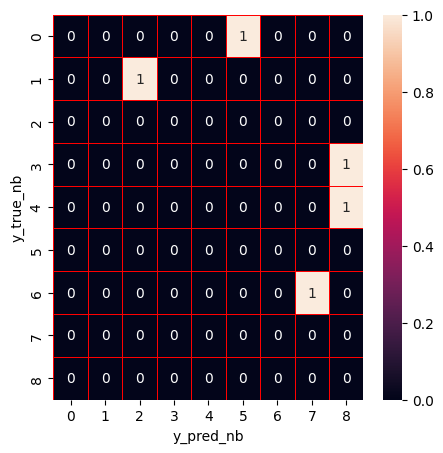

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = svc.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()